# Tutorial 4 Homework Task
The aim of this exercise is to test your understanding of KMeans algorithm.


### <font color="red">Tutorial Exercise</font>

As part of this task, you need to provide Python codes to achieve the following steps:

1. Acquire data from 'mylo.csv' and prepare data for anlaysis (remove missing values, handle noisy data [i.e. content completion<100], and normalise the data)
3. Using Elbow method find the most appropriate value of  K for KMean.

<font color="red">Submission Deadline: Please check the Mylo submission folder.</font>

In [8]:
#Answer to 1

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("mylo.csv")
print("Original shape:", df.shape)
print(df.head())

df = df.dropna()
print("After removing missing values:", df.shape)

before = df.shape[0]
df = df[df['content completion(%)'] >= 100]
after = df.shape[0]
print(f"Removed noisy data: kept {after}/{before} rows.")

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
X = df[numeric_cols]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols, index=df.index)

print("Normalised dataset (first 5 rows):")
print(X_scaled.head())





Original shape: (2198, 5)
   content completion(%)  DiscussionPostCreated  DiscussionPostReplies  \
0                   62.5                      0                    0.0   
1                   87.5                      9                    2.0   
2                   50.0                      0                    0.0   
3                  100.0                      5                    0.0   
4                   50.0                      0                    0.0   

   NumberOfDropboxSubmissions  TimeInContent  
0                           2        11564.0  
1                           2        52527.0  
2                           2        47991.0  
3                           2        30148.0  
4                           2        43971.0  
After removing missing values: (2195, 5)
Removed noisy data: kept 48/2195 rows.
Normalised dataset (first 5 rows):
    content completion(%)  DiscussionPostCreated  DiscussionPostReplies  \
3                     0.0               0.384615         

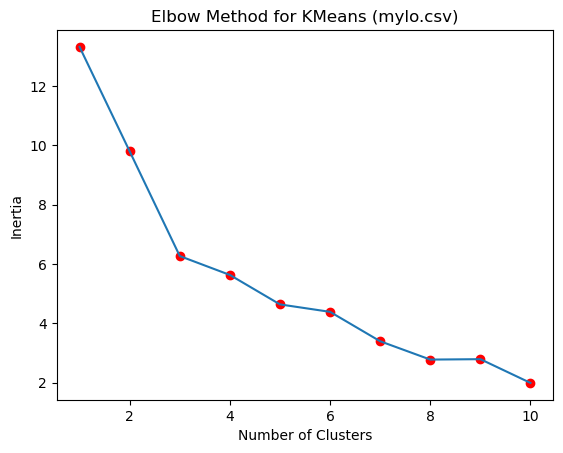

In [5]:
#Answer to 2


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
  

inertia = []                              
list_num_clusters = list(range(1, 11))    

for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(list_num_clusters, inertia)
plt.scatter(list_num_clusters, inertia, c="red")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans (mylo.csv)")
plt.show()


Based on this graph we can see after cluster number = 3 or 4, the graph starts becoming horizontal. This is the point which will be most optimal to choose.